In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import chi2
from numpy.linalg import inv


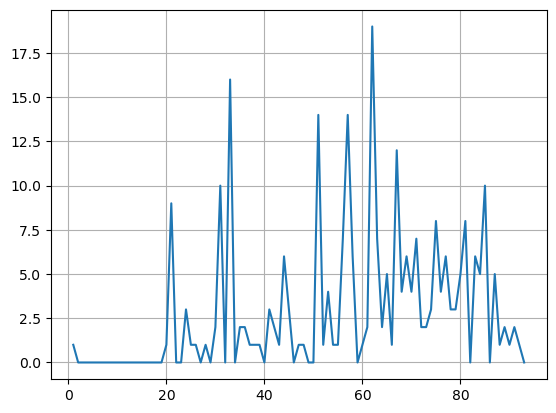

Pearson correlation: 0.337957732147185
Pearson correlation: 0.9683640032974627
                             OLS Regression Results                            
Dep. Variable:     Wystapienia_lacznie   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.937
Method:                  Least Squares   F-statistic:                     1370.
Date:                 Thu, 19 Dec 2024   Prob (F-statistic):           1.19e-56
Time:                         17:59:54   Log-Likelihood:                -421.63
No. Observations:                   93   AIC:                             847.3
Df Residuals:                       91   BIC:                             852.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

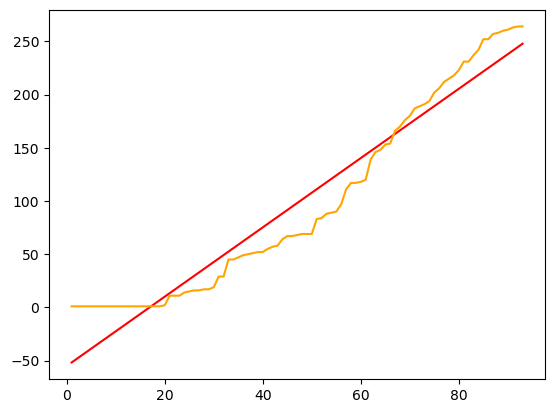

In [26]:
# Read the data from the CSV file
data = pd.read_csv('Dane_awarii.csv', sep=';', header=0)

# Plot the number of errors (`Liczba_bledow`) for each month (`Nr_miesiaca`)
plt.plot(data['Nr_miesiaca'], data['Liczba_bledow'])
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient between 'Liczba_bledow' and 'Nr_miesiaca'
corr, _ = pearsonr(data['Liczba_bledow'], data['Nr_miesiaca'])
print(f"Pearson correlation: {corr}")

# Add a new column 'Wystapienia_lacznie' to store the cumulative number of errors
data['Wystapienia_lacznie'] = 0

# Loop through all rows to calculate the cumulative sum of errors
for i in range(len(data)):
    # Cumulative sum of errors up to and including the current row
    data.loc[i, 'Wystapienia_lacznie'] = data['Liczba_bledow'][:i + 1].sum()


corr, _ = pearsonr(data['Wystapienia_lacznie'], data['Nr_miesiaca'])
print(f"Pearson correlation: {corr}")


X=sm.add_constant(data['Nr_miesiaca'])
y=data['Wystapienia_lacznie']
wynik= sm.OLS(y, X).fit()
print(wynik.summary())

# Plot the cumulative sum of errors for visualization
plt.plot(data['Nr_miesiaca'], wynik.predict(X), label='Regresja liniowa', color='red')
plt.plot(data['Nr_miesiaca'], data['Wystapienia_lacznie'], label='Skumulowane błędy', color='orange')
plt.show()
#regresja

#  wzor regresji
# sza

# napisz funcje logistyczna  metodą szacowania parametrow hottellinga


In [45]:
import numpy as np
from scipy.stats import chi2
from numpy.linalg import inv



import numpy as np
df=pd.DataFrame(data)


def logistic_hotelling(X, y, alpha=0.05, max_iter=1000, tol=1e-6):
    """
    Funkcja szacuje parametry logistycznej regresji za pomocą metody Hotellinga.

    Parametry:
    ----------
    X: numpy.ndarray
        Macierz cech (n-obserwacji, k-kolumn/parametrów).
    y: numpy.ndarray
        Wektor celów (n-obserwacji).
    alpha: float, optional
        Poziom istotności testu. Domyślnie 0.05.
    max_iter: int, optional
        Maksymalna liczba iteracji. Domyślnie 1000.
    tol: float, optional
        Tolerancja dla warunku stopu. Domyślnie 1e-6.

    Zwraca:
    --------
    Tuple[np.ndarray, float, float]
        beta: oszacowane parametry regresji,
        T2_stat: Statystyka testu Hotellinga,
        p_value: Wartość p dla testu Hotellinga.
    """
    # Konwersja X do macierzy jeśli jest on wektorem jednowymiarowym
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)

    # Dodaj kolumnę jedynek (intercept)
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Inicjalizacja parametrów
    n, k = X.shape
    beta = np.zeros(k)
    diff = np.inf

    for iteration in range(max_iter):
        # Oblicz prognozy (predykcja)
        z = np.dot(X, beta)
        p = 1 / (1 + np.exp(-z))  # Sigmoidalna funkcja logistyczna

        # Ogranicz wartości p, aby uniknąć problemów numerycznych
        p = np.clip(p, 1e-6, 1 - 1e-6)

        # Macierz wag (diagonalna z wartościami p(1-p))
        W = np.diag(p * (1 - p))

        # Gradient i Hessian
        gradient = np.dot(X.T, (y - p))
        H = -np.dot(X.T, np.dot(W, X))

        # Dodaj regularizację do macierzy Hessiana, aby uniknąć osobliwości
        H += np.eye(k) * 1e-6

        # Aktualizacja beta (przez Newton-Raphson)
        step = np.linalg.solve(H, gradient)
        beta -= step

        # Warunek stopu
        diff = np.linalg.norm(step)
        if diff < tol:
            break

    # Oblicz statystykę Hotellinga
    T2_stat = np.dot(beta.T, np.dot(np.linalg.inv(H), beta))
    p_value = 1 - chi2.cdf(T2_stat, k)

    # Wyniki końcowe
    return beta, T2_stat, p_value

suma_bledow = df['Wystapienia_lacznie'].sum()  # Suma wszystkich wartości z kolumny "Wystapienia_lacznie"
df['Prawdopodobienstwo'] = df['Wystapienia_lacznie'] / suma_bledow  # Obliczanie prawdopodobieństwa

print(logistic_hotelling(df[['Nr_miesiaca']].values,df['Prawdopodobienstwo'].values))


(array([-6.97559229,  0.04088439]), -667.5148001246133, 1.0)
